### Summer Olympics Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('summer.csv')

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.shape

(31165, 9)

#### 1. In how many cities Summer Olympics is held so far?

In [5]:
df.City.unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [6]:
print(f'Total number of cities : {len(df.City.unique())}')

Total number of cities : 22


#### 2. Which sport is having the most number of Gold medals so far? (Top 5)

In [7]:
second = df[df['Medal'] == 'Gold'].groupby('Sport')['Sport'].agg('count').sort_values(ascending = False).head()
second

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

In [8]:
def add_labels(data):
    for i in range(len(data)):
        plt.text(i, data[i]//2, data[i], ha = 'center', color = 'white') #add text in the centre of each bar

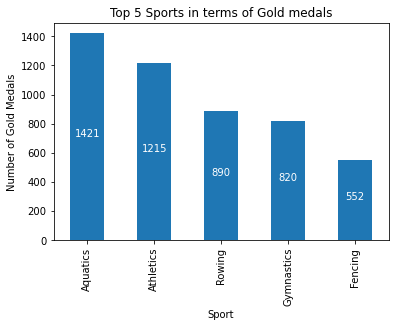

In [9]:
second.plot.bar()
add_labels(second)
plt.title('Top 5 Sports in terms of Gold medals')
plt.ylabel('Number of Gold Medals')
plt.show()

#### 3. Which sport is having the most number of medals so far? (Top 5)

In [10]:
third = df.groupby('Sport')['Medal'].agg('count').sort_values(ascending = False).head()
third

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

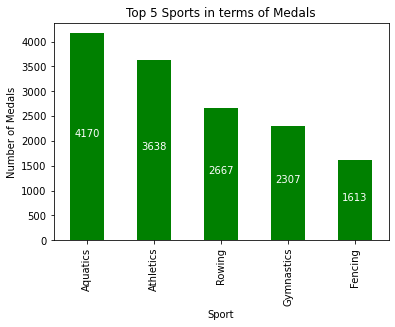

In [11]:
third.plot.bar(color = 'green')
add_labels(third)
plt.title('Top 5 Sports in terms of Medals')
plt.ylabel('Number of Medals')
plt.show()

In [12]:
#Verify
df[df['Sport'] == 'Rowing']['Medal'].agg('count')

2667

#### 4. Which player has won most number of medals? (Top 5)

In [13]:
fourth = df.groupby('Athlete')['Medal'].agg('count').sort_values(ascending = False).head()
fourth

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

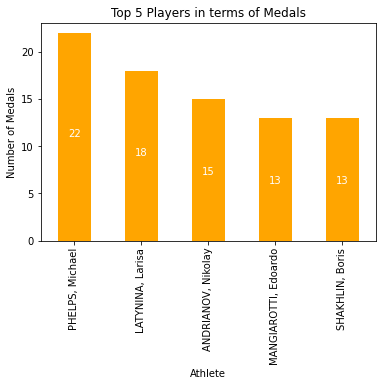

In [14]:
fourth.plot.bar(color = 'orange')
add_labels(fourth)
plt.title('Top 5 Players in terms of Medals')
plt.ylabel('Number of Medals')
plt.show()

In [15]:
#Verify
df[df['Athlete'] == 'PHELPS, Michael']['Medal'].agg('count')

22

#### 5. Which player has won most number of Gold medals? (Top 5)

In [16]:
fifth = df[df['Medal'] == 'Gold'].groupby('Athlete')['Medal'].agg('count').sort_values(ascending = False).head()
fifth

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

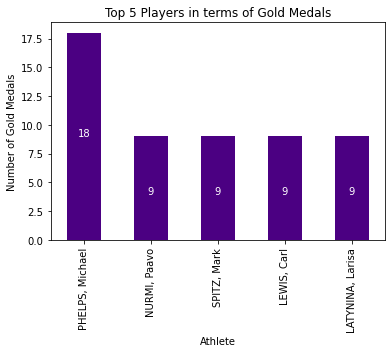

In [17]:
fifth.plot.bar(color = 'indigo')
add_labels(fifth)
plt.title('Top 5 Players in terms of Gold Medals')
plt.ylabel('Number of Gold Medals')
plt.show()

#### 6. In which year India won its first Gold Medal in Summer Olympics?

In [18]:
ind_df = df[df.Country == 'IND']
sixth = ind_df[ind_df.Medal == 'Gold']['Year'].sort_values().head(1)
sixth

5512    1928
Name: Year, dtype: int64

#### 7. Which event is the most popular in terms of the number of players? (Top 5)

In [19]:
seventh = df.groupby('Event')['Athlete'].agg('count').sort_values(ascending = False).head()
seventh

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

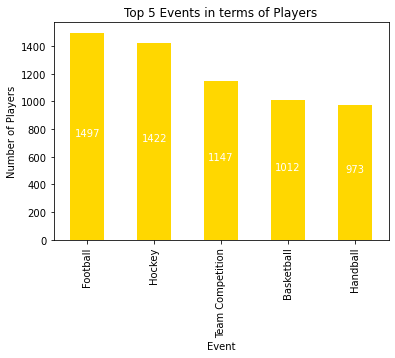

In [20]:
seventh.plot.bar(color = 'gold')
add_labels(seventh)
plt.title('Top 5 Events in terms of Players')
plt.ylabel('Number of Players') # number of players who won any medal in the particular event
plt.show()

#### 8. Which sport is having the most female Gold medalists? (Top 5)

In [21]:
eighth = df[df.Gender == 'Women'].groupby('Sport')['Medal'].agg('count').sort_values(ascending = False).head()
eighth

Sport
Aquatics      1726
Athletics     1163
Gymnastics     799
Rowing         651
Volleyball     497
Name: Medal, dtype: int64

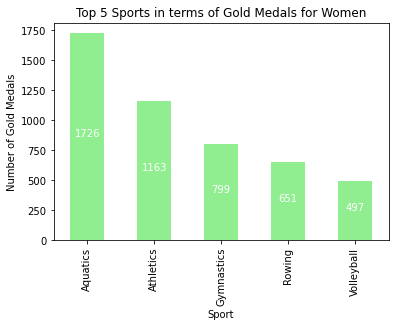

In [22]:
eighth.plot.bar(color = 'lightgreen')
add_labels(eighth)
plt.title('Top 5 Sports in terms of Gold Medals for Women')
plt.ylabel('Number of Gold Medals')
plt.show()